<a href="https://colab.research.google.com/github/spsc0894/cat_vs_non_cat/blob/main/deep_nn_with_momentum_and_dropout_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5.0,4.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#load dataset

train_data=h5py.File('/content/drive/My Drive/Colab Notebooks/cat_v_noncat_dset/train_catvnoncat.h5','r')
test_data=h5py.File('/content/drive/My Drive/Colab Notebooks/cat_v_noncat_dset/test_catvnoncat.h5','r')

print(train_data.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>


In [ ]:
train_set_x=np.array(train_data['train_set_x'])
train_set_y=np.array(train_data['train_set_y'])

test_set_x=np.array(test_data['test_set_x'])
test_set_y=np.array(test_data['test_set_y'])

classes=np.array(train_data['list_classes'])

In [ ]:
print(train_set_x.shape)
print(test_set_x.shape)
print(test_set_y.shape)
print(train_set_y.shape)

print(classes)

(209, 64, 64, 3)
(50, 64, 64, 3)
(50,)
(209,)
[b'non-cat' b'cat']


In [ ]:
train_y=train_set_y.reshape(1,train_set_y.shape[0])
test_y=test_set_y.reshape(1,test_set_y.shape[0])

In [ ]:
train_x_f=train_set_x.reshape(train_set_x.shape[0],-1).T
test_x_f=test_set_x.reshape(test_set_x.shape[0],-1).T

In [ ]:
print(train_x_f.shape)
print(train_y.shape)
print(test_x_f.shape)
print(test_y.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [ ]:
#standardization of inputs
train_x=train_x_f/255
test_x=test_x_f/255

In [ ]:
#normalization of inputs

m=train_x.shape[1]
mu=np.mean(train_x,axis=1,keepdims=True)
sigma=np.mean(np.power(train_x,2),axis=1,keepdims=True)
train_x=(train_x-mu)/sigma
test_x=(test_x-mu)/sigma

In [ ]:
def sigmoid(z):
  s=1/(1+np.exp(-z))
  return s

In [ ]:
def relu(z):
  r=np.maximum(0,z)
  return r

In [ ]:
x=np.random.randn(2,2)
print(x)
r=relu(x)
print(r)

[[-0.07649583  1.27988255]
 [ 0.603749    1.81069166]]
[[0.         1.27988255]
 [0.603749   1.81069166]]


In [ ]:
def relu_back(z):
  rb=np.array(z,copy=True)
  rb[z>=0]=1
  rb[z<0]=0
  return rb

In [ ]:
x=np.random.randn(2,2)
print(x)
r=relu(x)
print(r)
rb=relu_back(x)
print(rb)

[[ 1.0762042   1.08373164]
 [-0.21564179 -0.02634841]]
[[1.0762042  1.08373164]
 [0.         0.        ]]
[[1. 1.]
 [0. 0.]]


In [ ]:
def sigmoid_back(a):
  sb=np.multiply(a,(1-a))
  return sb

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def initialization(layer_dims):
  l=len(layer_dims)
  params={}
  

  for i in range(1,l):
    params["W"+str(i)]=np.random.randn(layer_dims[i],layer_dims[i-1])*np.sqrt(1/layer_dims[i-1])     #Xavier initialisation
    params["b"+str(i)]=np.zeros((layer_dims[i],1))

  return params


In [ ]:
parameters = initialization([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.00675866 -0.24536663  0.0041352   0.02951271 -0.12459912]
 [ 0.11843279  0.31869237  0.17148802  0.13826816  0.2049919 ]
 [-0.25654513 -0.24309945 -0.61892375 -0.64590527  0.06707533]
 [-0.93483722  0.04280261 -0.01416584 -0.2648117   0.61835911]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.23962032 -0.33900777  0.25516239  0.71938556]
 [-0.22587357 -0.30462238 -0.05736457  0.4856943 ]
 [-0.088781    0.10446712 -0.94912344  0.21388514]]
b2 = [[0.]
 [0.]
 [0.]]


In [ ]:
layer_dims=(train_x.shape[0],7,1)
params=initialization(layer_dims)

In [ ]:
print(params.keys())

dict_keys(['W1', 'b1', 'W2', 'b2'])


In [ ]:
print(params["W1"].shape)
print(params["b1"].shape)
print(params["W2"].shape)
print(params["b2"].shape)

(7, 12288)
(7, 1)
(1, 7)
(1, 1)


In [ ]:
def forward(X,layer_dims,params,predict=False):
  f_cache={}

  l=len(layer_dims)-1
  A=X
  if predict==False:
    keep_prob=0.8
  else:
    keep_prob=1
  for i in range(1,l):
    f_cache["z"+str(i)]=np.dot(params["W"+str(i)],A)+params["b"+str(i)]
    f_cache["a"+str(i)]=relu(f_cache["z"+str(i)])
    f_cache["dr"+str(i)]=np.random.rand(f_cache["a"+str(i)].shape[0],f_cache["a"+str(i)].shape[1])<keep_prob  #Note: for dropout we take np.random.rand 
    f_cache["a"+str(i)]=np.multiply(f_cache["a"+str(i)],f_cache["dr"+str(i)])
    f_cache["a"+str(i)]/=keep_prob
    A=f_cache["a"+str(i)]
  
  f_cache["z"+str(l)]=np.dot(params["W"+str(l)],A)+params["b"+str(l)]
  f_cache["a"+str(l)]=sigmoid(f_cache["z"+str(l)])
  A=f_cache["a"+str(l)]

  return A,f_cache


In [ ]:
A,f_cache=forward(train_x,layer_dims,params)

In [ ]:
print(A.shape)
print(f_cache.keys())

(1, 209)
dict_keys(['z1', 'a1', 'dr1', 'z2', 'a2'])


In [ ]:
def cost(A,Y,params):

  m=Y.shape[1]
  s=0
  c=(1/m)*np.sum(-np.multiply(Y,np.log(A))-np.multiply(1-Y,np.log(1-A)))
  l=len(params)//2+1

  

  return c

In [ ]:
def backward(X,Y,params,layer_dims,A,f_cache,keep_prob=0.8):
  m=X.shape[1]
  l=len(layer_dims)-1
  f_cache["a0"]=X

  b_cache={}

  b_cache["da"+str(l)]=-(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
  
  b_cache["dz"+str(l)]=sigmoid_backward(b_cache["da"+str(l)], f_cache["z"+str(l)])

  #b_cache["dz"+str(l)]=b_cache["da"+str(l)]*sigmoid_back(f_cache["a"+str(l)])
  b_cache["dw"+str(l)]=(1/m)*np.dot(b_cache["dz"+str(l)],f_cache["a"+str(l-1)].T)
  b_cache["db"+str(l)]=(1/m)*np.sum(b_cache["dz"+str(l)],axis=1,keepdims=True)

  for i in reversed(range(1,l)):
    b_cache["da"+str(i)]=np.dot(params["W"+str(i+1)].T,b_cache["dz"+str(i+1)])*f_cache["dr"+str(i)]
    b_cache["da"+str(i)]=b_cache["da"+str(i)]/keep_prob
    b_cache["dz"+str(i)]=relu_backward(b_cache["da"+str(i)], f_cache["z"+str(i)])
    #b_cache["dz"+str(i)]=b_cache["da"+str(i)]*sigmoid_back(f_cache["a"+str(i)])
    b_cache["dw"+str(i)]=(1/m)*np.dot(b_cache["dz"+str(i)],f_cache["a"+str(i-1)].T)
    b_cache["db"+str(i)]=(1/m)*np.sum(b_cache["dz"+str(i)],axis=1,keepdims=True)
  
  return b_cache




In [ ]:
def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

In [ ]:
v=initialize_velocity(params)

In [ ]:
print(v.keys())

dict_keys(['dW1', 'db1', 'dW2', 'db2'])


In [ ]:
def model(X,Y,params,layer_dims,learnin_rate=0.0075,epoch=2000,batch_size=64):

  
  l=len(layer_dims)
  m=X.shape[1]

  in_X=X
  in_Y=Y
  costs=[]
  v=initialize_velocity(params)
  beta=0.9
  batch_size=64
  nob=X.shape[1]//batch_size
  if X.shape[1]%batch_size==0:
    nomb=nob
  else:
    nomb=nob+1

  

  for ep in range(epoch):  

    for b in range(0,nomb):
      if b==nob:
        X=in_X[:,b*batch_size:]
        Y=in_Y[:,b*batch_size:]
      
      else:
        X=in_X[:,b*batch_size:(b+1)*batch_size]
        Y=in_Y[:,b*batch_size:(b+1)*batch_size]
      
      A,f_cache=forward(X,layer_dims,params)
      c=np.squeeze(cost(A,Y,params))
      #if i1<10:
        #print("cost after",str(i1),"iteration",str(c))
        #print("z1",f_cache["z1"])
        #print(np.dot(params["W1"],X)+params["b1"])
      
      b_cache=backward(X,Y,params,layer_dims,A,f_cache)
      #if i1<10:
        #print("a1",f_cache["a1"])
      

      for i in range(1,l):
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(i)] = beta * v['dW' + str(i)] + (1-beta)*(b_cache['dw' + str(i)])
        v["db" + str(i)] = beta * v['db' + str(i)] + (1-beta)*(b_cache['db' + str(i)])
      

    for i in range(1,l):
      # update parameters
      params["W" + str(i)] = params['W' + str(i)] - learnin_rate * v['dW' + str(i)]
      params["b" + str(i)] = params['b' + str(i)] - learnin_rate * v['db' + str(i)]
    
    print("cost after",str(ep),"epoch",str(c))
    costs.append(c)
  
  plt.plot(np.squeeze(costs))
  plt.show()
  

  
  return params






In [ ]:
layer_dims=(train_x.shape[0],70,70,70,1)
params=initialization(layer_dims)

costs for epoch: 0
cost after 0 epoch 0.7236128483020626
cost after 1 epoch 0.815600727438576
cost after 2 epoch 0.746185958096881
cost after 3 epoch 0.7309014429199795
cost after 4 epoch 0.6345702001641897
cost after 5 epoch 0.557530972657314
cost after 6 epoch 0.5512928163520746
cost after 7 epoch 0.47848531784601406
cost after 8 epoch 0.4940989279005429
cost after 9 epoch 0.4578859529792263
cost after 10 epoch 0.4719312108656478
cost after 11 epoch 0.4510702355997882
cost after 12 epoch 0.40694238054293286
cost after 13 epoch 0.484469650935527
cost after 14 epoch 0.38787049286024794
cost after 15 epoch 0.3839820642064413
cost after 16 epoch 0.32656018078400006
cost after 17 epoch 0.39934866471976316
cost after 18 epoch 0.33378027036423985
cost after 19 epoch 0.33338675251002453
cost after 20 epoch 0.4165684520747031
cost after 21 epoch 0.3447834982662837
cost after 22 epoch 0.36791650232562095
cost after 23 epoch 0.38357232736501523
cost after 24 epoch 0.28217878293980886
cost after

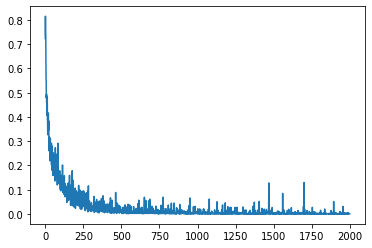

In [ ]:
for ep in range(1):
  print("costs for epoch:",str(ep))
  params=model(train_x,train_y,params,layer_dims)


In [ ]:
def predict(X, y, layer_dims,parameters):
  m = X.shape[1]
  n = len(parameters) // 2 # number of layers in the neural network
  p = np.zeros((1,m))
  
  A,f_cache=forward(X,layer_dims,parameters,predict=True)

  for i in range(0, A.shape[1]):
        if A[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
  print("Accuracy: "  + str(np.sum((p == y)/m)))

In [ ]:
predict(train_x,train_y,layer_dims,params)
predict(test_x,test_y,layer_dims,params)

Accuracy: 0.9999999999999998
Accuracy: 0.72
